In [1]:
import numpy as np 
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers,callbacks
from keras.utils import to_categorical
import numpy as np
import pandas as pd
train_data=pd.read_csv("train.csv")


X_train, X_val = train_test_split(train_data, test_size=0.2, random_state=18)

In [3]:

X=X_train.drop("emotions",axis=1)
Y=X_train["emotions"]
X_valid=X_val.drop("emotions",axis=1)
Y_valid=X_val["emotions"]

In [4]:
model=keras.Sequential([
    layers.BatchNormalization(input_shape=[2304]),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(7,activation='linear'),
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)
model.summary()


early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 2304)              9216      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               590080    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)              

Epoch 1/100


718/718 [==============================] - 12s 14ms/step - loss: 1.8554 - accuracy: 0.2821 - val_loss: 1.6588 - val_accuracy: 0.3366
Epoch 2/100
718/718 [==============================] - 10s 14ms/step - loss: 1.6878 - accuracy: 0.3287 - val_loss: 1.6030 - val_accuracy: 0.3725
Epoch 3/100
718/718 [==============================] - 10s 14ms/step - loss: 1.6395 - accuracy: 0.3494 - val_loss: 1.5839 - val_accuracy: 0.3744
Epoch 4/100
718/718 [==============================] - 9s 13ms/step - loss: 1.6078 - accuracy: 0.3674 - val_loss: 1.5690 - val_accuracy: 0.3934
Epoch 5/100
718/718 [==============================] - 10s 14ms/step - loss: 1.5790 - accuracy: 0.3812 - val_loss: 1.5529 - val_accuracy: 0.3922
Epoch 6/100
718/718 [==============================] - 9s 13ms/step - loss: 1.5716 - accuracy: 0.3834 - val_loss: 1.5475 - val_accuracy: 0.3950
Epoch 7/100
718/718 [==============================] - 10s 14ms/step - loss: 1.5451 - accuracy: 0.3929 - val_loss: 1.5431 - val_ac

<Axes: >

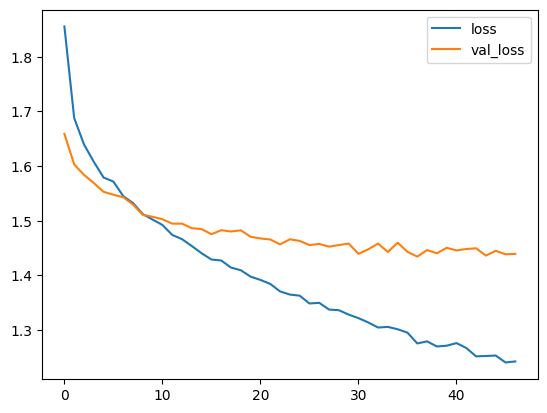

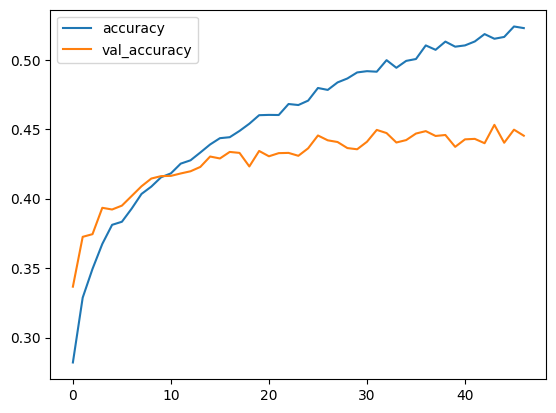

In [6]:
history = model.fit(X, Y, validation_data=(X_valid, Y_valid), epochs=100,callbacks=[early_stopping])
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()